## Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing and dividing the dataset

In [3]:
social=pd.read_csv("D:\\machine learning\\course\\classification\\random forest classification\\Social_Network_Ads.csv")

In [4]:
x=social.iloc[:,:-1].values
y=social.iloc[:,-1].values

## Dividing dataset into train and test set

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

## Feature Scaling

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

## Training our randome forest classification model

In [10]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

## prediciting random values

In [11]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


## comparing actual and predicted outcome

In [23]:
y_pred=classifier.predict(x_test)

In [24]:
print(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]]


## making evalution metrics such as confusion matrix and accuracy score

In [25]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[63  5]
 [ 4 28]]


0.91

## visualising the random forest classification on our training and testing dataset

C:\Users\coolv\AppData\Local\Temp\ipykernel_18908\2496487163.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)


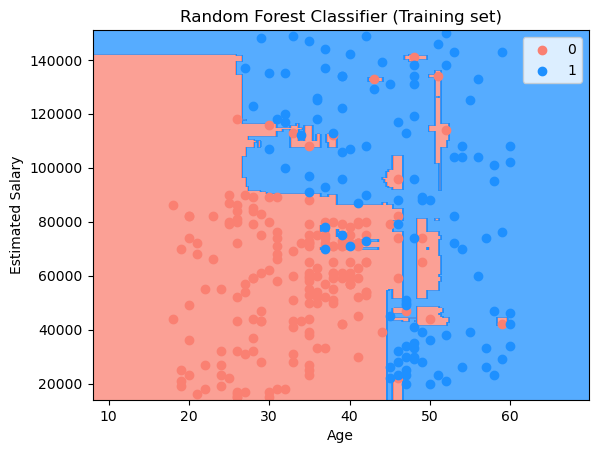

In [27]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.25),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.25))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Random Forest Classifier (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

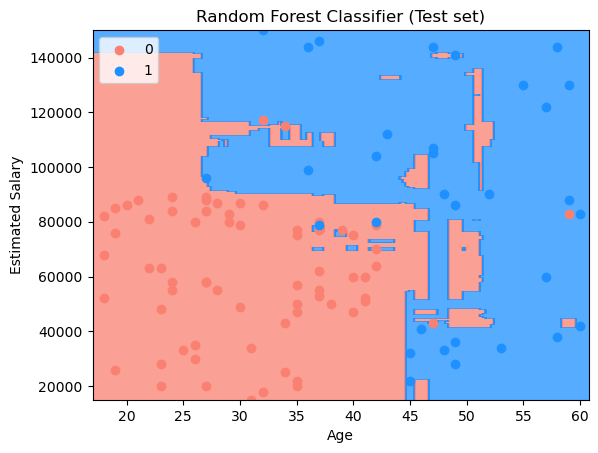

In [29]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_test), y_test
# Create a grid of points
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.25),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.25)
)
# Predict for each point on the grid
Z = classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape)
# Plot the decision boundary
plt.contourf(X1, X2, Z, alpha=0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']) )
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
# Define colors for scatter plot
colors = ['#FA8072', '#1E90FF']
# Plot the test set points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0], X_set[y_set == j, 1],
        color=colors[i], label=j
    )
# Add titles and labels
plt.title('Random Forest Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()